In [37]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
Ddata = pd.read_csv("Delivery_time.csv")
Ddata.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
Ddata.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


# Exploraratory Data Analysis (EDA) & Visualisation 

In [5]:
Ddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
Ddata.shape

(21, 2)

In [7]:
Ddata.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

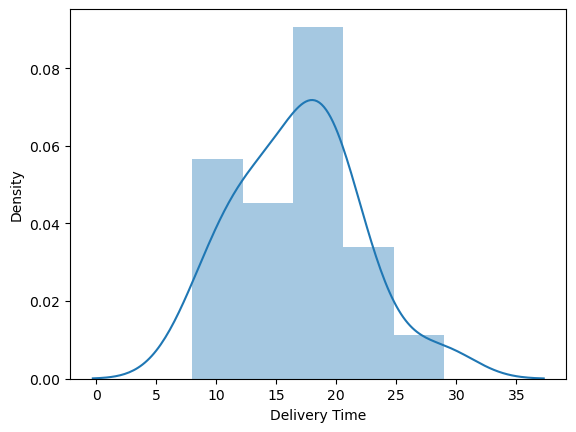

In [8]:
sns.distplot(Ddata['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

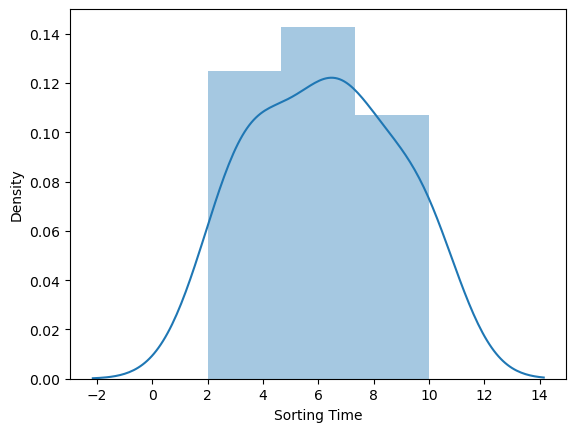

In [9]:
sns.distplot(Ddata['Sorting Time'])

# Rename the Columns 

In [12]:
data_ren=Ddata.rename({"Delivery Time":"Delivery_time", "Sorting Time":"Sorting_time"}, axis=1)

In [13]:
data_ren.head()

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [14]:
data_cop = data_ren.copy()

In [15]:
data_cop.head()

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# Outlier Detection

<AxesSubplot:>

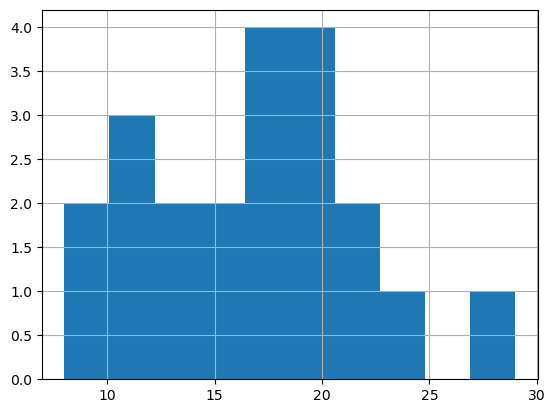

In [16]:

data_ren['Delivery_time'].hist()

<AxesSubplot:>

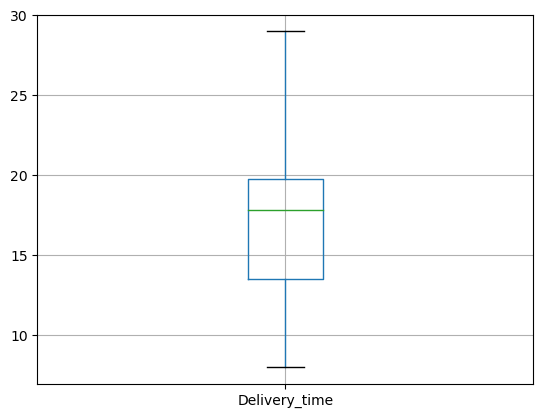

In [17]:

data_ren.boxplot(column='Delivery_time')

In [18]:
data_ren["Delivery_time"].describe()

count    21.000000
mean     16.790952
std       5.074901
min       8.000000
25%      13.500000
50%      17.830000
75%      19.750000
max      29.000000
Name: Delivery_time, dtype: float64

<AxesSubplot:>

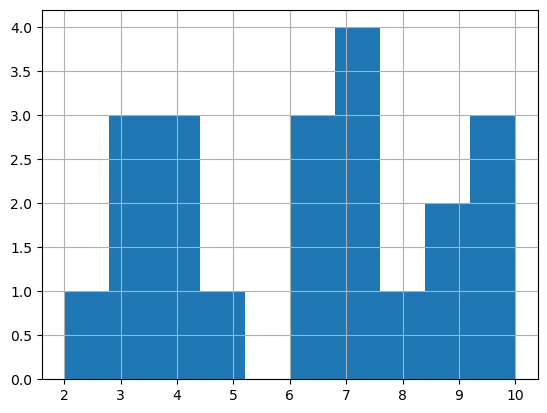

In [19]:
data_ren['Sorting_time'].hist()

<AxesSubplot:>

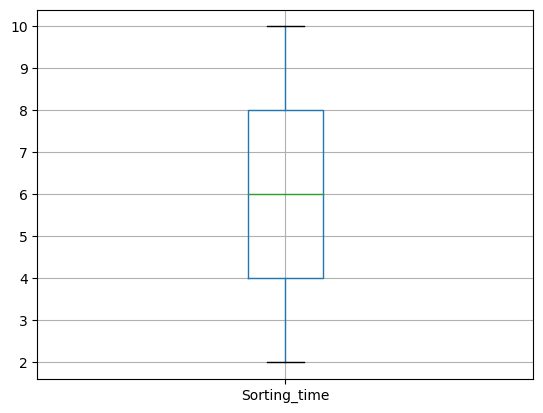

In [20]:
data_ren.boxplot(column='Sorting_time')

In [21]:
data_ren['Sorting_time'].describe()

count    21.000000
mean      6.190476
std       2.542028
min       2.000000
25%       4.000000
50%       6.000000
75%       8.000000
max      10.000000
Name: Sorting_time, dtype: float64

# Missing values Imputation

<AxesSubplot:>

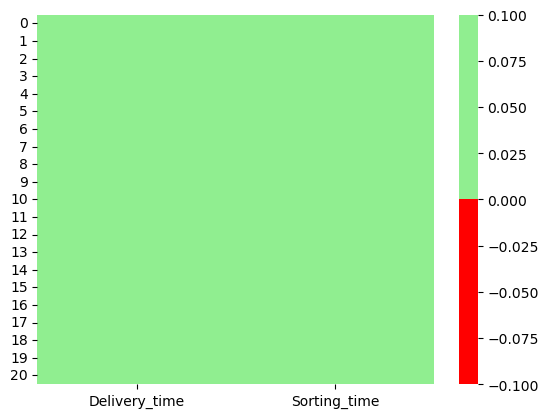

In [22]:
# using seaborn for heatmap
cols = data_ren.columns
colours = ['red', 'lightgreen']# in this figure red color shows Missing values and lightgreen shows all data
sns.heatmap(data_ren[cols].isnull(), cmap=sns.color_palette(colours))

In [23]:
data_ren[data_ren.isnull().any(axis=1)].head(6)

,Delivery_time,Sorting_time


There is no missing values in this given Data so can we move to next steps.

#  Correlation and Ploting the Data 

In [24]:
data_ren.head()

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [25]:
data_ren.corr()

,Delivery_time,Sorting_time
Delivery_time,1.000000,0.825997
Sorting_time,0.825997,1.000000


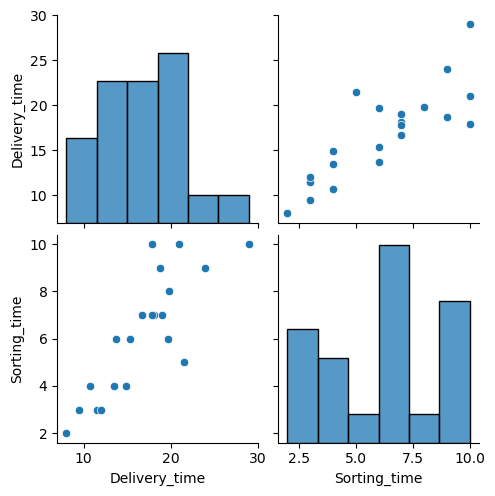

In [26]:
sns.pairplot(data_ren)

<AxesSubplot:xlabel='Sorting_time', ylabel='Delivery_time'>

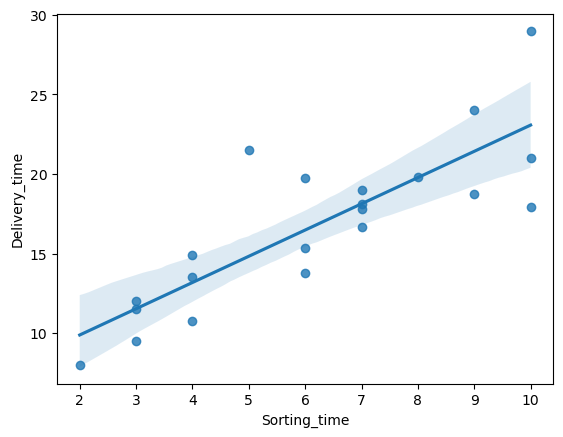

In [27]:
sns.regplot(x=data_ren["Sorting_time"], y=data_ren["Delivery_time"])

# Create Linear Regression Model

In [33]:
data_ren.head()

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [34]:
Lrmodel = smf.ols("Delivery_time~Sorting_time", data=data_ren).fit()

In [53]:
Lrmodel

# Testing the model

In [30]:
Lrmodel.params

Intercept       6.582734
Sorting_time    1.649020
dtype: float64

In [36]:
Lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        12:16:05   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Transformatyions on my Model

In [38]:
# 1. Log Transformation
Lrmodel = smf.ols("Delivery_time~np.log(Sorting_time)", data=data_ren).fit()

In [39]:
Lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           2.64e-06
Time:                        12:23:14   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
Lrmodel = smf.ols("np.log(Delivery_time)~Sorting_time", data=data_ren).fit()

In [41]:
Lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Mon, 13 Feb 2023   Prob (F-statistic):           1.59e-06
Time:                           12:24:49   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
#2. Square Root Trnasformation
data_ren["sq_rt"]=data_ren.Sorting_time**2

In [48]:
data_ren.head()

,Delivery_time,Sorting_time,sq_rt
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100


In [49]:
Lrmodel_upd = smf.ols("np.log(Delivery_time)~Sorting_time+sq_rt", data=data_ren).fit()

In [50]:
Lrmodel_upd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Mon, 13 Feb 2023   Prob (F-statistic):           2.20e-06
Time:                           12:31:15   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.6997      0.228      7.441      0.000       1.220       2.180
Sorting_time     0.2659      0.080      3.315      0.004       0.097       0.434
sq_rt           -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
Lrmodel_upd.tvalues, Lrmodel_upd.pvalues

(Intercept       7.440736
 Sorting_time    3.314818
 sq_rt          -2.031650
 dtype: float64,
 Intercept       6.771099e-07
 Sorting_time    3.853154e-03
 sq_rt           5.721977e-02
 dtype: float64)

In [52]:
Lrmodel_upd.rsquared, Lrmodel_upd.rsquared_adj

(0.764866634295373, 0.7387407047726366)